# Session #2

- Numpy
 - Create an array
 - Basic operations
 - `shape, size, type`
 - `empty, ones, zeros, arange`
 - `reshape, ravel`
- Scipy
 - `describe()`
 - docstring
 - Create a distribution
 - Sample variables `(rvs)`
 - PMF, PDF, CDF
 - Plot a distribution `(np.linspace, plt.hist)`
 - Plot variables to guess a dist `(sns.dist)`
 - Practice problems

In [1]:
import numpy as np # numerical python
from scipy import stats # statistics library from scientific python
import matplotlib.pyplot as plt # for plots
import seaborn as sns # for more aesthetic plots

sns.set() # set the color scheme to follow seaborn's standards.

# Numpy


In [2]:
# Create a numpy array
arr = np.empty((10, 200)) # filled with random numbers.
zer = np.zeros((10, 200)) # filled with zeros.
ones = np.ones((10, 200)) # filled with ones.

In [3]:
print(arr.shape) # (rows, cols)
print(arr.size)  # no. of elements in the array
print(arr.dtype) # datatype of each element in the array

(10, 200)
2000
float64


In [4]:
# Array of numbers from 0 to 16 spaced by 1 (default).
a = np.arange(0, 16)
print(a)

# Array of numbers from 0 to 16 spaced by 3.
a = np.arange(0, 16, 3)
print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  3  6  9 12 15]


In [5]:
# Reshape the 16 size vector to a (4 x 4) matrix.
b = np.arange(16)
b = b.reshape(4,4)
print(b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [6]:
# Flatten the matrix to a vector
print(b.ravel())

# HW: Look up the difference between ravel() and flatten()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


# Scipy

## Describe

In [7]:
arr = np.array([1,2,4,199, 100, -1])
desc = stats.describe(arr)
print(desc)
print(desc.mean)

DescribeResult(nobs=6, minmax=(-1, 199), mean=50.833333333333336, variance=6823.7666666666655, skewness=1.1230396971974306, kurtosis=-0.3627059544541069)
50.833333333333336


## Docstring

In [8]:
help(stats.describe)

Help on function describe in module scipy.stats._stats_py:

describe(a, axis=0, ddof=1, bias=True, nan_policy='propagate')
    Compute several descriptive statistics of the passed array.
    
    Parameters
    ----------
    a : array_like
        Input data.
    axis : int or None, optional
        Axis along which statistics are calculated. Default is 0.
        If None, compute over the whole array `a`.
    ddof : int, optional
        Delta degrees of freedom (only for variance).  Default is 1.
    bias : bool, optional
        If False, then the skewness and kurtosis calculations are corrected
        for statistical bias.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan.
        The following options are available (default is 'propagate'):
    
        * 'propagate': returns nan
        * 'raise': throws an error
        * 'omit': performs the calculations ignoring nan values
    
    Returns
    -------
    nobs : i

In [9]:
def func(x):
    """A dummpy function that adds 10 to the input"""
    return x + 10

help(func)

Help on function func in module __main__:

func(x)
    A dummpy function that adds 10 to the input



## Distributions

In [10]:
# Binomial n: #trials, p: probability of success
binom = stats.binom(n=10, p=0.25)

# Normal: loc: mean, scale: std
normal = stats.norm(loc=0, scale=2)

In [11]:
# Pseudo-randomness: Used to replicate randomness

# generator(seed)
np.random.seed(7)

dist = stats.binom(n=10, p=0.25)
print(dist.rvs(5))
print(dist.rvs(5))

[1 4 2 3 5]
[3 2 1 2 2]


In [12]:
# Sample 5 numbers from the binomial distribution.
print(binom.rvs(5))

# Sample 5 numbers from the normal distribution.
print(normal.rvs(5))

[3 4 2 1 2]
[-0.02993641  0.04278135  1.49756215 -0.16627166  0.14145828]


## PMF, PDF, CDF

In [13]:
dist = stats.binom(n=1000, p=0.2)

# Probability of exactly 5 successes.
dist.pmf(5)

9.911886389768154e-88

In [14]:
dist = stats.norm(loc=1, scale=2)

# Probability that a random variable drawn from this distribution will
# be less than or equal to 1.
dist.cdf(1)

0.5

## Plots

### Plot variables to guess the distribution

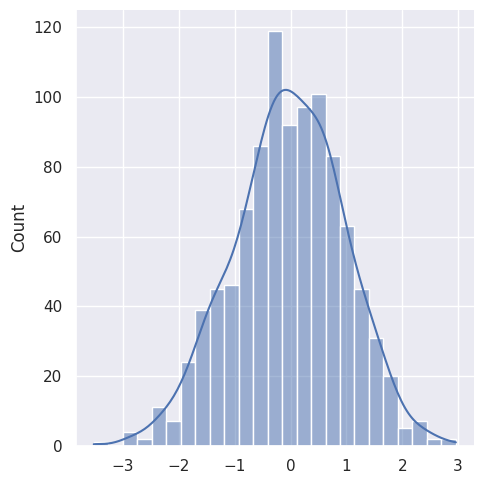

In [15]:
vars = stats.norm(loc=0, scale=1).rvs(1000)
# Say you did not know which distribution vars came from.
# Maybe I send them to you in a file.

# Create a histogram to guess the distribution.
# kde=True generates a smooth line connecting the histogram bins
# to aid visualization
sns.displot(vars, kde=True)
plt.show()

### Plot a known distribution

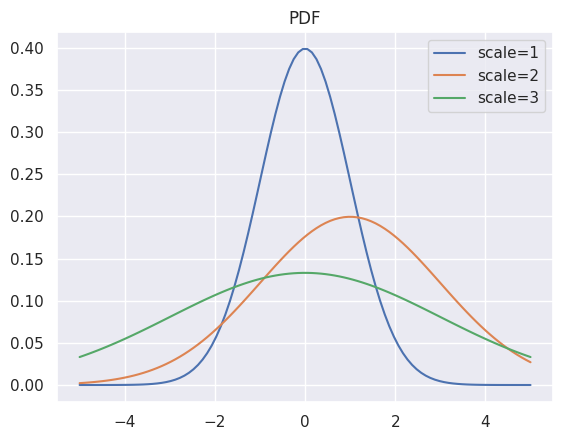

In [16]:
# To get a smooth curve, we need eqally spaced values.

# Generate a sequence of equally spaced x values.
x = np.linspace(-5, 5, 100)

# Compute the probability of each x.
y1 = stats.norm.pdf(x, loc=0, scale=1)
y2 = stats.norm.pdf(x, loc=1, scale=2)
y3 = stats.norm.pdf(x, loc=0, scale=3)

# Plot x and y
plt.plot(x, y1, label="scale=1")
plt.plot(x, y2, label="scale=2")
plt.plot(x, y3, label="scale=3")

plt.title("PDF")
plt.legend()
plt.show()

### Plot the cumulative distribution

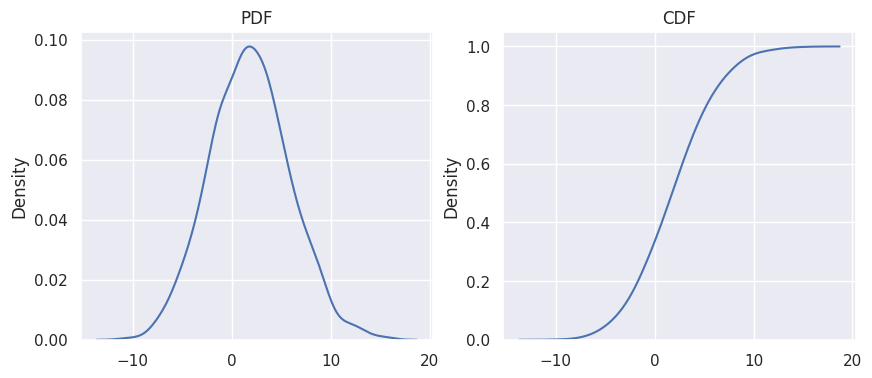

In [17]:
# Plot the cumulative distribution
dist = stats.norm(loc=2, scale=4)
var = dist.rvs(1000)

# Genearte two a figure with 1 row and 2 columns.
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# kdeplot is same as displot(kind="kde")
# However, displot cannot be plotted in subplots.
# It takes an entire figure.
sns.kdeplot(var, cumulative=False, ax=ax[0])
sns.kdeplot(var, cumulative=True,  ax=ax[1])

ax[0].set_title("PDF")
ax[1].set_title("CDF")

plt.show()

## Practice

### Confirm normal distribution claim
- 68% lies within 1 std
- 95% lies within 2 std
- 99.7% lies within 3 std

In [18]:
mean = 1
std = 3
dist = stats.norm(loc=mean, scale=std)

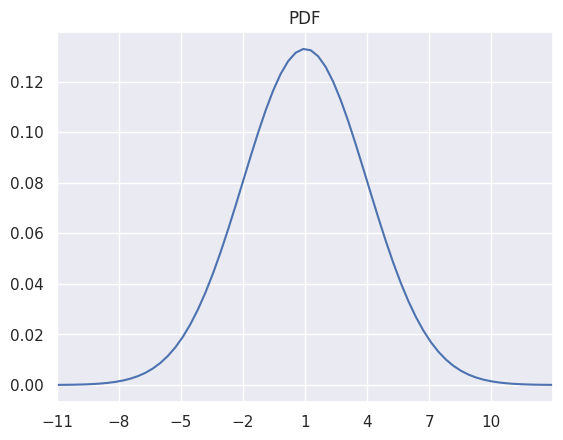

In [19]:
x = np.linspace(-6 * std, 6 * std, 100)
y = dist.pdf(x)

plt.plot(x, y)

# Set the limits of x-axis.
plt.xlim(mean - (4 * std), mean + (4 * std))

# xticks: locations along the x-axis where the tick marks appear.
# Set them to be multiples of std for easy comprehension.
plt.xticks(range(mean - (4 * std), mean + (4 * std), std))

plt.title("PDF")
plt.show()

In [20]:
print(dist.cdf(mean + (1 * std)) - dist.cdf(mean - (1 * std)))
print(dist.cdf(mean + (2 * std)) - dist.cdf(mean - (2 * std)))
print(dist.cdf(mean + (3 * std)) - dist.cdf(mean - (3 * std)))

0.6826894921370859
0.9544997361036416
0.9973002039367398


### Defective items

- Every item has a 5% chance of being defective.
- Order 10 items.
- What is the probability that exactly 2 items are defective?

In [21]:
stats.binom.pmf(k=2, n=10, p=0.05)

0.07463479852001963

### MCQ
- 90 questions
- 4 options, 1 correct
- What is the probability that Student X gets at least 10 questions correct?

In [22]:
1 - stats.binom.cdf(k=9, n=90, p=0.25)

0.9997028012822888